# Proyek Analisis Data: Nama dataset
- Nama: Eka Nur Solicha
- Email: eka.solicha94@gmail.com
- Id Dicoding: eka_solicha38

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata harga barang yang dipesan customer dan berstatus terkirim 'delivered'?
- Apa kategori product yang paling banyak dipesan oleh customer?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#cek data order_items apakah sudah benar
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
#cek data orders apakah sudah benar
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#cek data products apakah sudah benar
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [5]:
#melihat parameter statistik table order items
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [6]:
#mengidentifikasi missing value pada table order items
order_items_df.isnull().sum()
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [7]:
#cek outliers pada data price di table order items
q25, q75 = np.percentile(order_items_df['price'], 25), np.percentile(order_items_df['price'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = order_items_df[(order_items_df['price'] < minimum) | (order_items_df['price'] > maximum)]
print(outliers)

                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   

                              product_id                         seller_id  \
7       557d850972a7d6f792fd18ae1400d9b6  5996cddab893a4652a15592fb58ab8db   
16      3f27ac8e699df3d300ec4a5d8c5cf0b2  fcb5ace8bcc92f75707dc0f01a27d269   
26      c389f712c4b4510bc997cee93e8b1a28  bfd27a966d91cfa

In [8]:
#melihat parameter statistik table orders
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [9]:
#melihat parameter statistik table products
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [10]:
#mengidentifikasi missing value pada table products
products_df.isnull().sum()
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
#mengidentifikasi duplicate data pada table products
df = pd.read_csv("products_dataset.csv")
df.duplicated().sum()

0

### Cleaning Data

In [12]:
#dropping missing value pada table order items
order_items_df.dropna(axis=0, inplace=True)

In [13]:
#mengatasi outliers pada table order items
df = pd.read_csv("order_items_dataset.csv")

Q1 = (df['price']).quantile(0.25)
Q3 = (df['price']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = df['price'] < minimum
kondisi_more_than = df['price'] > maximum
 
df['price'] = df['price'].mask(kondisi_lower_than, minimum).mask(kondisi_more_than, maximum)

In [14]:
#dropping missing value pada table products
products_df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore data orders dan order items

In [15]:
#mengelompokkan orders berdasarkan order statusnya
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [16]:
#Menganalisis data harga berdasarkan nomor order itemnya
order_items_df.groupby (by="order_item_id").agg({
    "order_id": "nunique",
    "price": ["max", "min", "sum", "mean"]

})

order_id    price                               
               nunique      max   min          sum        mean
order_item_id                                                 
1                98666  6735.00  0.85  12428396.31  125.964327
2                 9803  2299.95  0.85    837725.68   85.456052
3                 2287  1790.00  1.20    178396.37   78.004534
4                  965  1790.00  1.20     74539.65   77.243161
5                  460  1680.00  1.20     34758.51   75.561978
6                  256  1680.00  1.20     19498.37   76.165508
7                   58  1680.00  1.20      5841.29  100.711897
8                   36  1680.00  1.20      4347.61  120.766944
9                   28   284.99  1.20      2249.97   80.356071
10                  25   284.99  1.20      2039.23   81.569200
11                  17   179.99  1.20      1022.50   60.147059
12                  13   108.00  1.20       663.77   51.059231
13                   8   100.00  1.20       435.37   54.421250
14                   7   100.00  1.20       405.38   57.911429
15                   5   100.00  1.20       316.39   63.278000
16                   3   100.00  1.20       199.90   66.633333
17                   3   100.00  1.20       199.90   66.633333
18                   3   100.00  1.20       199.90   66.633333
19                   3   100.00  1.20       199.90   66.633333
20                   3   100.00  1.20       199.90   66.633333
21                   1     7.80  7.80         7.80    7.800000

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [17]:
#menggabungkan table orders dan order items
order_price_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_price_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [18]:
#Jumlah pesanan delivered dan harganya
order_price_df.groupby (by="order_status").agg({
    "customer_id": "nunique",
    "price": ["sum", "mean"]

})

customer_id        price            
                 nunique          sum        mean
order_status                                     
approved               2       209.60   69.866667
canceled             625     95235.27  175.710830
created                5         0.00         NaN
delivered          96478  13221498.11  119.980563
invoiced             314     61526.37  171.382646
processing           301     60439.22  169.297535
shipped             1107    150727.44  127.196152
unavailable          609      2007.69  286.812857

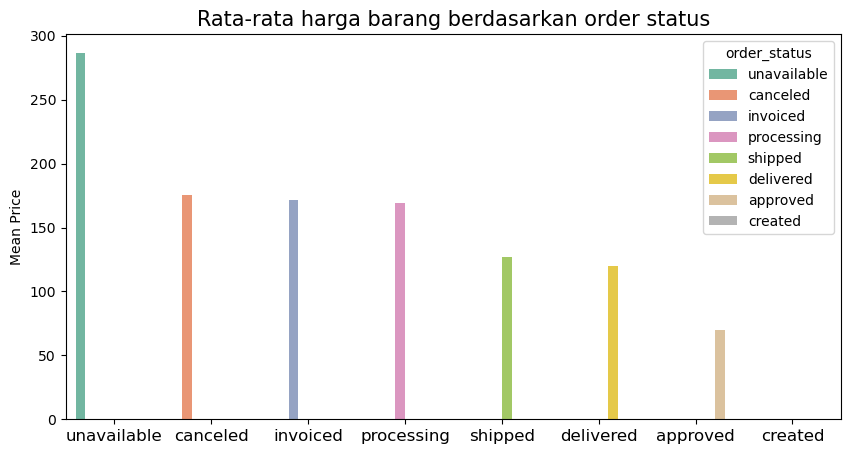

In [19]:
#bar chart harga rata-rata product berdasarkan order statusnya
mean_price_df = order_price_df.groupby(by="order_status")['price'].mean().reset_index()

plt.figure(figsize=(10, 5))

colors = sns.color_palette("Set2")

sns.barplot(
    y="price", 
    x="order_status",
    hue="order_status",
    data=mean_price_df.sort_values(by="price", ascending=False),
    palette=colors,
  )
plt.title("Rata-rata harga barang berdasarkan order status", loc="center", fontsize=15)
plt.ylabel("Mean Price")  # Labeling the y-axis
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

In [20]:
#menggabungkan table order items dan product category
product_ordered_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
product_ordered_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [21]:
#Melihat jumlah order berdasarkan product categorynya
product_ordered_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  9417
beleza_saude                     8836
esporte_lazer                    7720
informatica_acessorios           6689
moveis_decoracao                 6449
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: order_id, Length: 73, dtype: int64

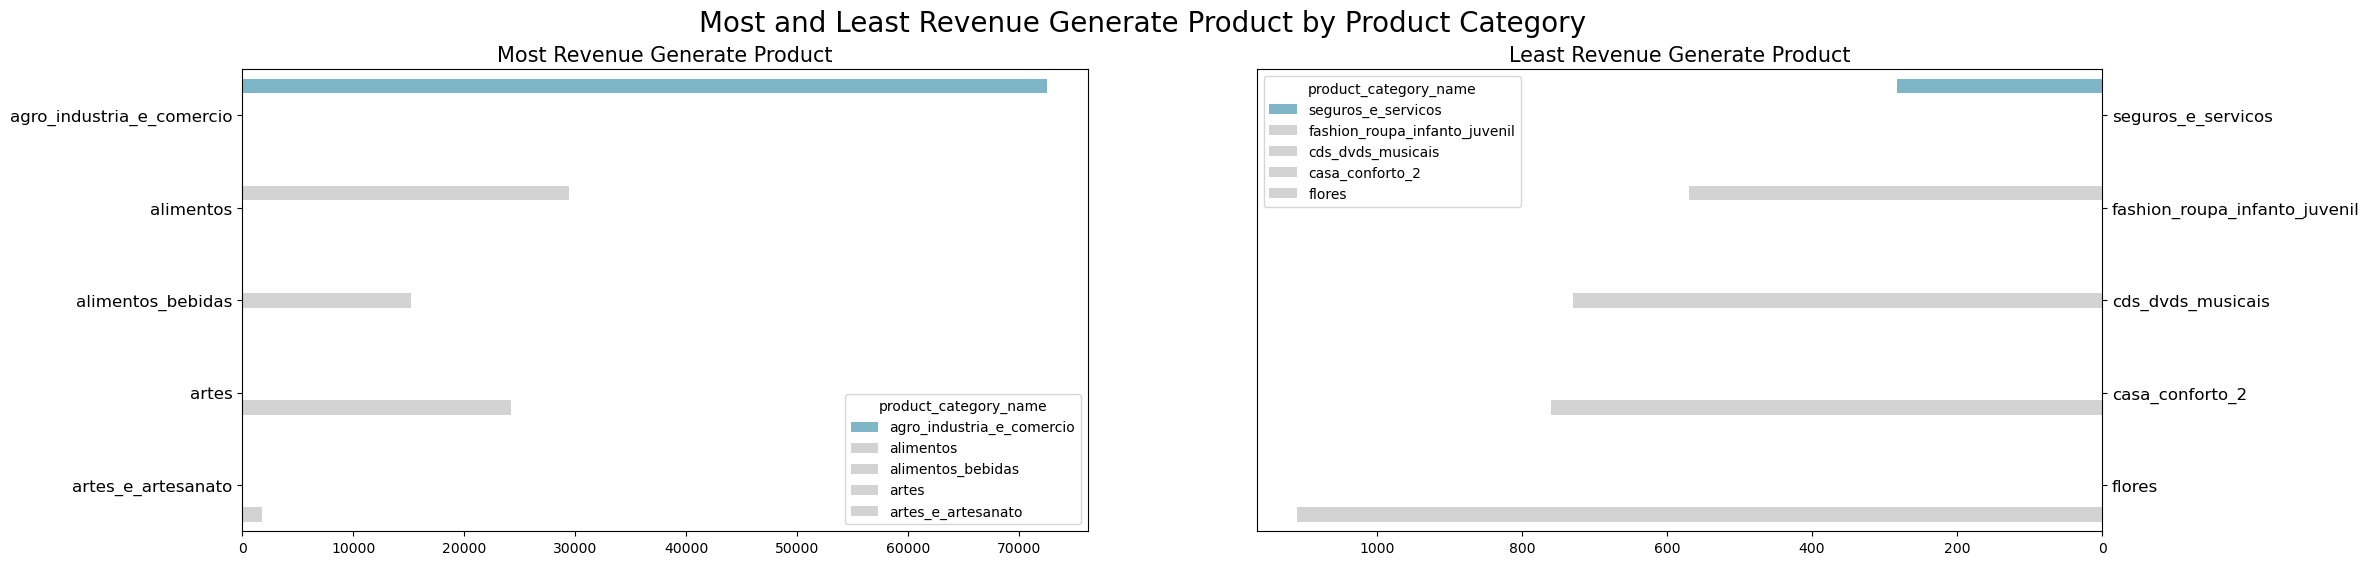

In [22]:
sum_price_df = product_ordered_df.groupby(by="product_category_name")['price'].sum().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="price", y="product_category_name", hue="product_category_name", orient='h', data=sum_price_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Revenue Generate Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
 
sns.barplot(x="price", y="product_category_name", hue="product_category_name", orient='h', data=sum_price_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Revenue Generate Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Most and Least Revenue Generate Product by Product Category", fontsize=20)
plt.show()

## Conclusion

-  Rata-rata harga barang yang dipesan customer dan berstatus terkirim 'delivered' adalah 119.980563
- Kategori product yang paling banyak dipesan oleh customer adalah cama_mesa_banho